## IMPORT LIBRARIES

In [21]:
import sys,os,time
import numpy as np
import pandas as pd
os.environ['MPLCONFIGDIR'] = "/w/halla-scshelf2102/solid/bishnu/RC_plots/pol_Bishnu/"
#import matplotlib as plt
import matplotlib.pyplot as plt
plt.rc('text',usetex=True)
plt.rc('font', family='Times Roman')
plt.rc('font',weight='bold')
plt.rcParams['axes.linewidth'] = 1


plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['font.family'] = "Times Roman"

plt.rcParams['xtick.major.pad'] = 2
plt.rcParams['ytick.major.pad'] = 0
plt.rcParams['text.latex.preamble']=r"\usepackage{bm} \usepackage{amsmath}"
from matplotlib.legend_handler import HandlerLine2D
from matplotlib.colors import LogNorm

##  Read a TEXT FILE IN PANDAS

In [22]:
pathmlFile="./"
filename370Signal="signalLED_bgLED370_run2337_fadc.ml"
data370Signal=pd.read_csv(f"{pathmlFile}{filename370Signal}", delimiter=r"\s+",index_col=0, header=None)
data370Signal.head()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,,,,,,,,,,,,,,,,,,,,,
0,0.05,0.00,0.00,0.00,0.00,1.47,0.00,0.00,0.0,0.00,...,0.05,0.0,3.87,0.00,0.0,0.00,0.00,0.0,0.20,0.53
1,0.00,0.00,0.00,1.35,0.00,0.00,0.00,0.00,0.0,0.00,...,0.00,0.0,1.20,0.14,0.0,2.73,0.00,0.0,0.23,0.64
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.00,0.0,0.00,0.00,0.0,0.93,0.00,0.0,0.20,0.00
3,0.14,0.00,0.00,0.00,0.00,0.00,3.02,0.00,0.0,0.08,...,0.00,0.0,0.00,0.00,0.0,0.32,0.00,0.0,0.00,1.52
4,0.15,1.29,0.08,0.00,0.14,0.21,0.12,0.12,0.0,0.26,...,0.00,0.0,0.00,0.06,0.0,0.00,0.29,0.0,0.00,0.00


## CHECK THE DATA TYPES

In [24]:
data370Signal.dtypes

## CONVERT THE STRING OR OBJECT INTO NUMERIC

In [26]:
dataDunUnp = dataDunUnp.apply(pd.to_numeric, errors='coerce')

## CONVERT ONE BY ONE COLUMN
#dataDunUnp['qt_Q'] = dataDunUnp['qt_Q'].astype(float)

## ADD A NEW COLUMN WITH ADD ALL THE ROWS INTO A NEW COLUMN

In [8]:
data370Signal["sum370Signal"] = data370Signal.sum(axis=1)

## GET MAXIMUM OF THE ROW INTO A NEW COLUMN

In [4]:
data370Signal["maxVal"]= data370Signal.max(axis=1)

## GET MAXIMUM VALUE FOR THE COLUMN 0:60 IN A ROW  e.g [0, 1, 5, 8] THEN NEW ROW WILL BE 8
#data370Signal["maxVal370S"]= data370Signal.iloc[:,:60].max(axis=1)

## REMOVE THE ROWS IF VALUES OF GIVEN COLUMN DOES NOT PASS THE THRESHOLD

In [ ]:
data370Signal = data370Signal[data370Signal['maxVal370S'].gt(7)]

## COSMITIC OF THE PLT.HIST LIKE MAKE MULTIPLE PLOTS 

1287   20000  0.06435


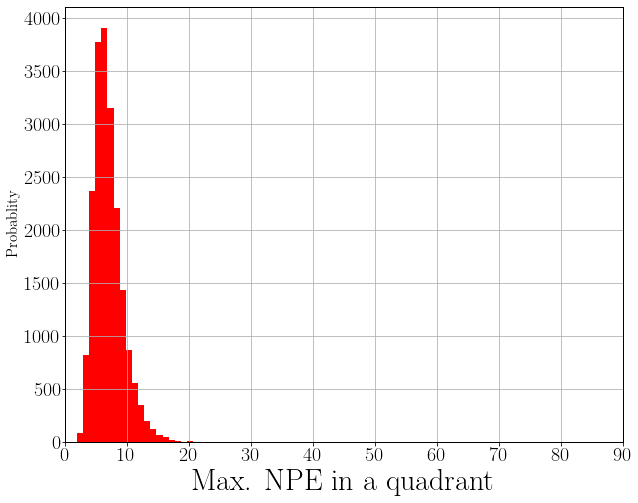

In [20]:
max_range=80
ax=data370Signal.hist(column='maxVal', bins=max_range,range=(1,max_range), color='r', ylabelsize=20, linestyle='solid',  label='test' ,xlabelsize=20, linewidth=4.0,figsize=(10,8))
plt.ylabel("Probablity", size=15)
plt.xlabel("Max. NPE in a quadrant ",fontsize=30)
labels=['kera']
plt.title("")
plt.xlim(0,90)
#plt.ylim(0,800)
plt.xticks(fontsize=20)
#plt.legend(fontsize=20)
deno=len(data370Signal['maxVal'])
num=len(data370Signal[data370Signal['maxVal'] > 11])

print(num," ",deno,"", num/deno)

## FORMATTING 

In [21]:
def BisToDun(Q2):
    #conversion=0
    if Q2==8 or Q2==100:
        conversion=2
    elif Q2==15 or Q2==25:
        conversion=3
    elif Q2==9 or Q2==2:
        conversion=1
    else: print('Check your Q2 and converstion file')
    return conversion
Asy="Col"
Lab="EIC"
Q2=25
conversion=BisToDun(Q2)
FilePathBis="./"
fileNameBishnuUnp="Unp_{}{}_const_alpha.txt".format(Lab,conversion)
dataBisUnp=pd.read_csv(f"{FilePathBis}{fileNameBishnuUnp}", delimiter=r"\s+",names=["qt","born", "rc", "err"])
dataBisUnp.head()
dataBisUnp.dtypes


qt      float64
born    float64
rc      float64
err     float64
dtype: object

## Changing the data types to numberic 

In [ ]:
dataDunUnp = dataDunUnp.apply(pd.to_numeric, errors='coerce')


### Adding new lines of columns in existing datafiles  (Adding QtDun from one dataframe to "dataBisUnp" on Fourth column

In [ ]:
QtDun=dataDun["qt_to_Q"]
dataBisUnp.insert(4, "RCDu", RcDun)

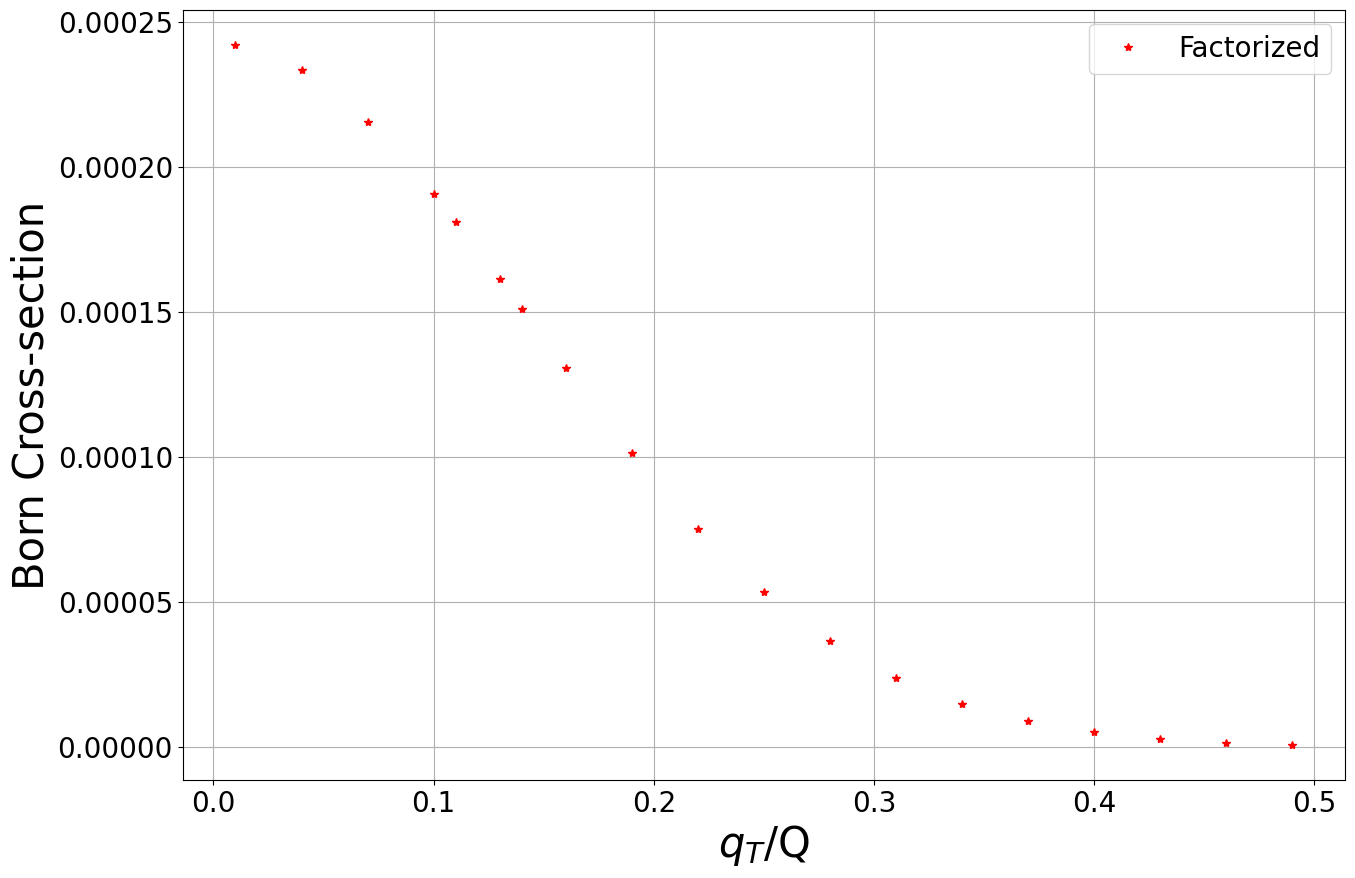

In [74]:

ax=dataBisUnp.plot(x='qt', y='born', color="red",marker='*', grid=True,linestyle='None', label="Factorized", figsize=(15,10))
#plt.rcParams["font.weight"] = "bold"
## LINESTYLE CAN BE 'solid', 'dashed'
ax.set_xlabel("$q_{T}$/Q",fontsize=30)
ax.set_ylabel("Born Cross-section",fontsize=30)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.rc('font', weight='bold')
plt.rc('xtick.major', size=5, pad=7)
plt.rc('xtick', labelsize=15)
#plt.rcdefaults()


In [8]:
import scipy
import numpy as np
from scipy import stats

x = 1.0
pdf_probability = scipy.stats.norm.pdf(x, loc=0, scale=1)

print(pdf_probability)

0.24197072451914337


In [15]:
scipy.stats.norm(0, 1)
scipy.stats.norm(0, 1).pdf(0)
scipy.stats.norm(0, 1).cdf(0)


0.5

In [8]:
import numpy as np
M=0.938272088
rs=4.7
Q2=10
y=0.2
#rs  = np.sqrt(2*E_beam*M)
E_beam=rs**2/2*M
count=1
print(E_beam)
while y<1.01:
    x   =Q2/rs**2/y
    print(x,  ", ")
    y+=0.1
    count+=1
print(count)
#9195.0664624

10.363215211960002
2.2634676324128558 , 
1.5089784216085704 , 
1.1317338162064279 , 
0.9053870529651424 , 
0.7544892108042854 , 
0.6467050378322446 , 
0.565866908103214 , 
0.502992807202857 , 
0.4526935264825713 , 
10


In [2]:
2.072e-03/1.709e-03# 1.352e-03

1.2124049151550615

In [3]:
def while1():
    x = 0
    while 1:
        x += 1
        print(x)
        if x == 10:
            break
    
#while1()            


1
2
3
4
5
6
7
8
9
10
